# Data Analysis - 2019 NL MVP

## Overview
* Analyze 2019 NL MVP finalists batting statistics
* Compare 2019 NL MVP finalists to past NL MVP winners batting statistics dating back to 2000
* Can a reasonable conclusion of who should win the 2019 NL MVP award be determined based on the analysis?

## Import Libraries

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# Interactive visualization libraries
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

## Import Data Set

In [2]:
# Import data set of NL MVP winners from 2000-2018 and the 3 2019 NL MVP finalists
# Data set provided (will need to change file path below if using the data for yourself)
mvpNL = pd.read_csv('Batting_NL_MVP_2019.csv')

# Check dataframe
# mvpNL

## Data Manipulation

#### Remove Clayton Kershaw from Dataframe
* Clayton Kershaw, LA Dodgers pitcher, won the 2014 NL MVP.
* For the purpose of this analysis, Clayton Kershaw will be removed from the data set of past NL MVP winners since he won the award on the basis of his pitching statistics and not his batting statistics.

In [3]:
# Remove Clayton Kershaw from dataframe
mvpNL.drop(14, inplace = True)

# Reset the index of the dataframe
mvpNL.reset_index(inplace = True)

# Remove 'index' column from dataframe
mvpNL.drop('index', axis = 1, inplace = True)

# Check dataframe
# mvpNL

#### Calculate Additional Statistics
* AVG - Batting Average
* SLG - Slugging Percentage
* OBP - On-Base Percentage
* OPS - On-Base plus Slugging
* teamW% - Team Winning Percentage

In [4]:
# Batting average
mvpNL['AVG'] = mvpNL['H'] / mvpNL['AB']

# Slugging percentage
mvpNL['SLG'] = (mvpNL['H'] - mvpNL['2B'] - mvpNL['3B'] - mvpNL['HR'] + 2*mvpNL['2B'] + 3*mvpNL['3B'] + 4*mvpNL['HR']) / mvpNL['AB']

# On-base percentage
mvpNL['OBP'] = (mvpNL['H'] + mvpNL['BB'] + mvpNL['IBB'] + mvpNL['HBP']) / (mvpNL['AB'] + mvpNL['BB'] + mvpNL['IBB'] + mvpNL['HBP'] + mvpNL['SH'] + mvpNL['SF'])

# On-base plus slugging
mvpNL['OPS'] = mvpNL['SLG'] + mvpNL['OBP']

# Tean winning percentage
mvpNL['teamW%'] = mvpNL['teamW'] / (mvpNL['teamW'] + mvpNL['teamL'])

# Check dataframe
# mvpNL

#### Create 2000-2018 NL MVP Winners Dataframe

In [5]:
# Create new dataframe of 2000-2018 NL MVP winners
mvpNL2018 = mvpNL[:18]

# Check dataframe
# mvpNL2018

#### Create 20019 NL MVP Finalists Dataframe

In [6]:
# Create new dataframe of 2019 NL MVP finalists
mvpNL2019 = mvpNL[18:21]

# Reset the index of the dataframe
mvpNL2019.reset_index(inplace = True)

# Remove 'index' column from dataframe
mvpNL2019.drop('index', axis = 1, inplace = True)

# Check dataframe
# mvpNL2019

## Data Analyzation

#### Analyze Key Performance Indicator Statistics for 2000-2018 NL MVP Winners
* teamW% - Team Winning Percentage
* WAR - Wins Above Replacement
* OPS - On-Base plus Slugging
* AVG - Batting Average
* OBP - On-Base Percentage
* SLG - Slugging Percentage
* R - Runs Scored
* RBI - Runs Batted In
* HR - Home Runs

In [7]:
# Describe KPI statistics for 2000-2018 NL MVP winners
mvpNL2018[['playerName', 'teamW%', 'WAR', 'OPS', 'AVG', 'OBP', 'SLG', 'R', 'RBI', 'HR']].describe()

,teamW%,WAR,OPS,AVG,OBP,SLG,R,RBI,HR
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.569020,8.466667,1.110385,0.327558,0.465115,0.645270,114.777778,112.666667,41.444444
std,0.041103,1.819825,0.181296,0.022835,0.086827,0.100157,14.428548,17.486129,12.664086
min,0.475309,5.200000,0.879385,0.281407,0.348659,0.507719,78.000000,84.000000,21.000000
25%,0.550926,7.450000,0.997589,0.318889,0.406714,0.596390,106.750000,101.250000,33.750000
50%,0.570988,7.900000,1.045672,0.328840,0.441286,0.620314,117.500000,110.500000,40.000000
75%,0.591960,9.575000,1.139735,0.335362,0.485618,0.659019,123.750000,123.000000,45.750000
max,0.639752,11.900000,1.485331,0.369727,0.672999,0.863445,139.000000,149.000000,73.000000


#### Analyze Key Performance Indicator Statistics for 2019 NL MVP Finalists
* teamW% - Team Winning Percentage
* WAR - Wins Above Replacement
* OPS - On-Base plus Slugging
* AVG - Batting Average
* OBP - On-Base Percentage
* SLG - Slugging Percentage
* R - Runs Scored
* RBI - Runs Batted In
* HR - Home Runs

In [8]:
# Display KPI statistics for 2019 NL MVP finalists
mvpNL2019[['playerName', 'teamW%', 'WAR', 'OPS', 'AVG', 'OBP', 'SLG', 'R', 'RBI', 'HR']]

,playerName,teamW%,WAR,OPS,AVG,OBP,SLG,R,RBI,HR
0,Cody Bellinger,0.654321,9.0,1.053408,0.304659,0.424376,0.629032,121,115,47
1,Anthony Rendon,0.574074,6.3,1.017125,0.319266,0.418960,0.598165,117,126,34
2,Christian Yelich,0.549383,7.1,1.115388,0.329243,0.444631,0.670757,100,97,44


#### Analysis

#### Cody Bellinger
* Ranks 1st amongst 2019 NL MVP finalists - 44%
    * Team W %
    * WAR
    * R
    * HR
* Ranks 2nd amongst 2019 NL MVP finalists - 44%
    * OPS
    * OBP
    * SLG
    * RBI
* Ranks 3rd amongst 2019 NL MVP finalists - 44%
    * AVG
* Ranks above 2000-2018 NL MVP winners average - 56%
    * Team W % (1st amongst 2000-2018 NL MVP winners and 2019 NL MVP finalists)
    * WAR
    * R
    * RBI
    * HR
* Ranks below 2000-2018 NL MVP winners average - 44%
    * OPS
    * AVG
    * OBP
    * SLG
    
#### Anthony Rendon
* Ranks 1st amongst 2019 NL MVP finalists - 11%
    * RBI
* Ranks 2nd amongst 2019 NL MVP finalists - 33%
    * Team W %
    * AVG
    * R
* Ranks 3rd amongst 2019 NL MVP finalists - 56%
    * WAR
    * OPS
    * OBP
    * SLG
    * HR
* Ranks above 2000-2018 NL MVP winners average - 33%
    * Team W %
    * R
    * RBI
* Ranks below 2000-2018 NL MVP winners average - 67%
    * WAR
    * OPS
    * AVG
    * OBP
    * SLG   
    * HR
    
#### Christian Yelich
* Ranks 1st amongst 2019 NL MVP finalists - 44%
    * OPS
    * AVG
    * OBP
    * SLG
* Ranks 2nd amongst 2019 NL MVP finalists - 22%
    * WAR
    * HR
* Ranks 3rd amongst 2019 NL MVP finalists - 33%
    * Team W %
    * R
    * RBI
* Ranks above 2000-2018 NL MVP winners average - 44%
    * OPS
    * AVG
    * SLG
    * HR
* Ranks below 2000-2018 NL MVP winners average - 56%
    * Team W %
    * WAR
    * OBP
    * R
    * RBI

## Data Visualization

#### Plot Key Performance Indicator Statistics by Year
* teamW% - Team Winning Percentage
* WAR - Wins Above Replacement
* OPS - On-Base plus Slugging
* AVG - Batting Average
* OBP - On-Base Percentage
* SLG - Slugging Percentage
* R - Runs Scored
* RBI - Runs Batted In
* HR - Home Runs

#### Note about the plots
* Plots provide a visual representation of the data and analysis provided in Data Analyzation section above
* 'x' represents past NL MVP winners
* 'blue line' represents linear regression fit of past NL MVP winners
* 'blue circle' represents Cody Bellinger
* 'orange circle' represents Anthony Rendon
* 'green circle' represents Christian Yelich

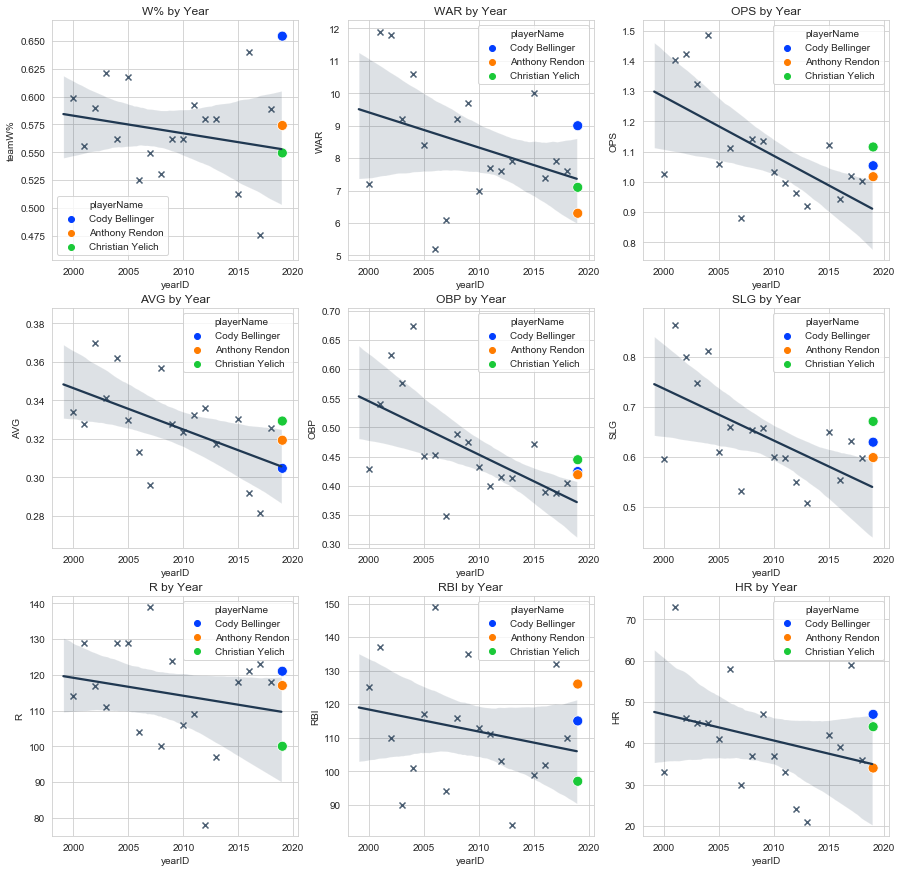

In [9]:
# Initialize subplots
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))

# W% by Year
# 2000-2018 NL MVP winners
sns.regplot(data = mvpNL2018, x = 'yearID', y = 'teamW%', ax = axs[0, 0], color = '#203851', marker = 'x').set_title('W% by Year')
# 2019 NL MVP finalists
sns.scatterplot(data = mvpNL2019, x = 'yearID', y = 'teamW%', hue = 'playerName', ax = axs[0, 0], palette = 'bright', s = 100)

# WAR by Year
# 2000-2018 NL MVP winners
sns.regplot(data = mvpNL2018, x = 'yearID', y = 'WAR', ax = axs[0, 1], color = '#203851', marker = 'x').set_title('WAR by Year')
# 2019 NL MVP finalists
sns.scatterplot(data = mvpNL2019, x = 'yearID', y = 'WAR', hue = 'playerName', ax = axs[0, 1], palette = 'bright', s = 100)

# OPS by Year
# 2000-2018 NL MVP winners
sns.regplot(data = mvpNL2018, x = 'yearID', y = 'OPS', ax = axs[0, 2], color = '#203851', marker = 'x').set_title('OPS by Year')
# 2019 NL MVP finalists
sns.scatterplot(data = mvpNL2019, x = 'yearID', y = 'OPS', hue = 'playerName', ax = axs[0, 2], palette = 'bright', s = 100)

# AVG by Year
# 2000-2018 NL MVP winners
sns.regplot(data = mvpNL2018, x = 'yearID', y = 'AVG', ax = axs[1, 0], color = '#203851', marker = 'x').set_title('AVG by Year')
# 2019 NL MVP finalists
sns.scatterplot(data = mvpNL2019, x = 'yearID', y = 'AVG', hue = 'playerName', ax = axs[1, 0], palette = 'bright', s = 100)

# OBP by Year
# 2000-2018 NL MVP winners
sns.regplot(data = mvpNL2018, x = 'yearID', y = 'OBP', ax = axs[1, 1], color = '#203851', marker = 'x').set_title('OBP by Year')
# 2019 NL MVP finalists
sns.scatterplot(data = mvpNL2019, x = 'yearID', y = 'OBP', hue = 'playerName', ax = axs[1, 1], palette = 'bright', s = 100)

# SLG by Year
# 2000-2018 NL MVP winners
sns.regplot(data = mvpNL2018, x = 'yearID', y = 'SLG', ax = axs[1, 2], color = '#203851', marker = 'x').set_title('SLG by Year')
# 2019 NL MVP finalists
sns.scatterplot(data = mvpNL2019, x = 'yearID', y = 'SLG', hue = 'playerName', ax = axs[1, 2], palette = 'bright', s = 100)

# R by Year
# 2000-2018 NL MVP winners
sns.regplot(data = mvpNL2018, x = 'yearID', y ='R', ax = axs[2, 0], color = '#203851', marker = 'x').set_title('R by Year')
# 2019 NL MVP finalists
sns.scatterplot(data = mvpNL2019, x = 'yearID', y = 'R', hue = 'playerName', ax = axs[2, 0], palette = 'bright', s = 100)

# RBI by Year
# 2000-2018 NL MVP winners
sns.regplot(data = mvpNL2018, x = 'yearID', y = 'RBI', ax = axs[2, 1], color = '#203851', marker = 'x').set_title('RBI by Year')
# 2019 NL MVP finalists
sns.scatterplot(data = mvpNL2019, x = 'yearID', y = 'RBI', hue = 'playerName', ax = axs[2, 1], palette = 'bright', s = 100)

# HR by Year
# 2000-2018 NL MVP winners
sns.regplot(data = mvpNL2018, x = 'yearID', y = 'HR', ax = axs[2, 2], color = '#203851', marker = 'x').set_title('HR by Year')
# 2019 NL MVP finalists
sns.scatterplot(data = mvpNL2019, x = 'yearID', y = 'HR', hue = 'playerName', ax = axs[2, 2], palette = 'bright', s = 100)

#### Analysis

#### Cody Bellinger
* Above regression line fit of 2000-2018 NL MVP winners - 89%
    * Team W %
    * WAR
    * OPS
    * AVG
    * OBP
    * SLG
    * R
    * RBI
    * HR
* On regression line fit of 2000-2018 NL MVP winners - 11%
    * AVG
* Below regression line fit of 2000-2018 NL MVP winners - 0%
    * None
    
#### Anthony Rendon
* Above regression line fit of 2000-2018 NL MVP winners - 78%
    * Team W %
    * OPS
    * AVG
    * OBP
    * SLG
    * R
    * RBI
* At regression line fit of 2000-2018 NL MVP winners - 11%
    * HR
* Below regression line fit of 2000-2018 NL MVP winners - 11%
    * WAR 

#### Christian Yelich
* Above regression line fit of 2000-2018 NL MVP winners - 56%
    * OPS
    * AVG
    * OBP
    * SLG
    * HR
* At regression line fit of 2000-2018 NL MVP winners - 33%
    * Team W %
* Below regression line fit of 2000-2018 NL MVP winners - 11%
    * WAR 
    * R
    * RBI

## Conclusion

#### Cody Bellinger
* Cody Bellinger put up monster numbers all across the board. He ranked top 2 in 8 of the 9 key performance indicator statistics amongst the 2019 NL MVP finalists. To top it all off, the LA Dodgers set a franchise record for most wins in a season and if he were to win, this would be the highest team winning percentage of NL MVP winners since at least 2000. I believe that his numbers alone should be enough for the MVP however, taking his team success into consideration, I think it's a no-brainer that Cody Bellinger should be named the 2019 NL MVP.

#### Anthony Rendon
* Anthony Rendon was able to put together a great year which was capped off with a world series title. As far as the 2019 NL MVP, his numbers are just not good enough to put him ahead of Bellinger or Yelich as he only ranked top 2 in 4 of the 9 key performance indicator statistics. Whether he wins the 2019 NL MVP or not, I think Rendon is happy about how this season played out. 

#### Christian Yelich
* Like Bellinger, Christian Yelich was putting up massive numbers throughout the season. That was until his late injury cut short his 2019 season. Yelich only played in 130 games compared to Bellinger’s 156 and Rendon’s 146 games played. Regardless, Yelich ranked top 2 in 6 of the 9 key performance indicator statistics. Not surprising, he was last amongst the 2019 NL finalists in runs and RBIs but, was only 3 HRs shy of Bellinger despite playing in 26 fewer games. It’s unfortunate that Yelich season came to an early end especially since he was on pace to finish at the top of just about every key performance indicator statistic. I believe if not for the injury, Yelich would have won back-to-back NL MVP awards.  

# Further Considerations
* I believe this was a simple yet effective means of analyzing the 2019 NL MVP finalists to determine who should be crowned MVP. With that in mind, a much deeper analysis can be explored in order to further break down the 2019 NL MVP finalists' seasons. Key data that can be examined includes, but is not limited to:
    * Defensive metrics
    * HR rate
    * R rate
    * RBI rate
    * Team War
    * comparing data of past NL MVP finalists who did not win the MVP
    * expanding data to the AL